# Declaration of Originality

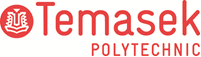

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Myat Phone Myint (2403584B)
* Tutorial Group                : P04 
* Tutor						    : Emile Sabastian 
* Submission Date               : 12/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Build a supervised machine learning model that predicts whether a telecom customer will churn (leave the service) based on customer demographics, subscribed services, and billing/contract information, so that the company can proactively identify at-risk customers and apply retention strategies to reduce churn.

# 2. Data Understanding

## 2.1 Load dataset

In [30]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Interpretation
- Dataset contains 7,043 customer records
- 21 features including the target variable 'Churn'
- Data appears well-structured with no obvious formatting issues
- Mix of categorical and numerical features

### Initial Observation
- customerID: Unique identifier (This column will be dropped during preprocessing)
- Target variable: Churn (Yes/No)
- Features include demographics, services, account info, and charges

## 2.2 Summary Statistics

In [33]:
## Understand the type of variable for each column
# Check data types and non-null counts
print("="*70)
print("DATASET INFORMATION")
print("="*70)
df.info()
print("="*70)

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

In [ ]:
# Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Insight: No traditional missing values (NaN) are detected. However, TotalCharges is stored as 'object' type instead of numeric. This suggests possible data quality issues (e.g., spaces or empty strings).

In [ ]:
# Check for empty strings or spaces in TotalCharges
print("\n" + "="*70)
print("DATA TYPE INVESTIGATION: TotalCharges")
print("="*70)
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head(10).tolist()}") # get first 10 values


DATA TYPE INVESTIGATION: TotalCharges
TotalCharges data type: object
Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']


In [ ]:
# Check for non-numeric values
non_numeric = df[df['TotalCharges'].str.strip() == ''] # rows where TotalCharges is empty or space
print(f"\nEmpty/Space values in TotalCharges: {len(non_numeric)}")

if len(non_numeric) > 0:
    print("\nRecords with empty TotalCharges:")
    print(non_numeric[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())
    
print("="*70)


Empty/Space values in TotalCharges: 11

Records with empty TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


Insights: 
- TotalCharges contains 11 empty string values (spaces)
- These correspond to customers with 0 tenure (just signed up)
- Empty values make sense: new customers haven't accumulated charges yet

In [39]:
# Numerical Features Summary
print("\n" + "="*70)
print("NUMERICAL FEATURES SUMMARY STATISTICS")
print("="*70)

# Convert TotalCharges to numeric for analysis
df_temp = df.copy()
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
print(df_temp[numerical_cols].describe())
print("="*70)


NUMERICAL FEATURES SUMMARY STATISTICS
            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  7043.000000     7043.000000   7032.000000    7043.000000
mean     32.371149       64.761692   2283.300441       0.162147
std      24.559481       30.090047   2266.771362       0.368612
min       0.000000       18.250000     18.800000       0.000000
25%       9.000000       35.500000    401.450000       0.000000
50%      29.000000       70.350000   1397.475000       0.000000
75%      55.000000       89.850000   3794.737500       0.000000
max      72.000000      118.750000   8684.800000       1.000000


### Insights:
TENURE:
- Range: 0 to 72 months (6 years)
- Mean: 32.4 months, Median: 29 months
- Distribution: Fairly spread across customer lifecycle stages
- Min value of 0 confirms presence of brand new customers

MONTHLY CHARGES:
- Range: $18.25 to $118.75
- Mean: $64.76, Median: $70.35
- Std Dev: $30.09 (high variability - different service packages)
- No obvious outliers (all values reasonable for telecom services)

TOTAL CHARGES:
- Range: $18.80 to $8,684.80
- Mean: $2,283.30, Median: $1,397.47
- Right-skewed distribution (mean > median)
- High max value: Long-tenure, high-spending customers

SENIOR CITIZEN:
- Binary: 0 (No) or 1 (Yes)
- Mean: 0.162 → ~16% of customers are senior citizens

In [40]:
# Categorical Features Summary
print("\n" + "="*70)
print("CATEGORICAL FEATURES SUMMARY")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID column

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"  → {df[col].nunique()} unique values")
    
print("="*70)


CATEGORICAL FEATURES SUMMARY

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
  → 2 unique values

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
  → 2 unique values

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
  → 2 unique values

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
  → 2 unique values

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
  → 3 unique values

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
  → 3 unique values

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
  → 3 unique values

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
  → 3 u

### Findings:
- Gender is mostly balanced which means there is no gender bias in dataset.
- Looking at InternetService, most of them have internet service.
- The majority of the contract is "Month-to-month" meaning most customers are on flexible, short-term contracts.
- Looking at PaymentMethod: the most common is "Electronic check".

## Insights:
Most features are binary or have 3-4 categories. "No internet service" appears in multiple service columns which needs careful encoding.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [41]:
## Understanding distribution of target
# Calculate churn statistics
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("="*70)
print("TARGET VARIABLE DISTRIBUTION: CHURN")
print("="*70)
print(f"No Churn:  {churn_counts['No']:,} customers ({churn_percentage['No']:.2f}%)")
print(f"Churn:     {churn_counts['Yes']:,} customers ({churn_percentage['Yes']:.2f}%)")
print(f"\nImbalance Ratio: {churn_counts['No'] / churn_counts['Yes']:.2f}:1")
print(f"Churn Rate: {churn_percentage['Yes']:.2f}%")
print("="*70)

TARGET VARIABLE DISTRIBUTION: CHURN
No Churn:  5,174 customers (73.46%)
Churn:     1,869 customers (26.54%)

Imbalance Ratio: 2.77:1
Churn Rate: 26.54%


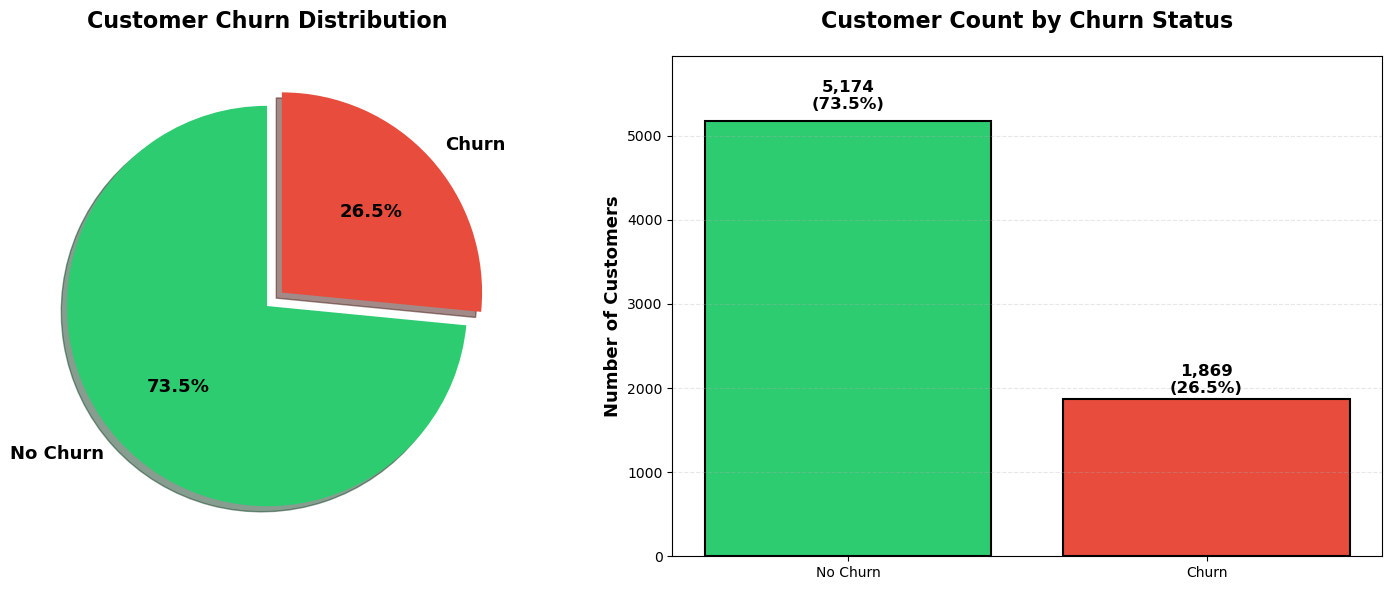

In [46]:
# Visualization 1: Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
explode = (0, 0.1)  # Explode the Churn slice

axes[0].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=explode,
            textprops={'fontsize': 13, 'weight': 'bold'},
            shadow=True)
axes[0].set_title('Customer Churn Distribution', 
                  fontsize=16, weight='bold', pad=20)

# Bar chart with counts
bars = axes[1].bar(['No Churn', 'Churn'], churn_counts.values, 
                   color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Customers', fontsize=13, weight='bold')
axes[1].set_title('Customer Count by Churn Status', 
                  fontsize=16, weight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

axes[1].set_ylim(0, max(churn_counts.values) * 1.15)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height * 1.02,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

### Insights:
- There is a imbalanced ratio with No Churn having 5174 customers while Churn having 1869 customers.
- Roughly 1 in 4 customers churn annually.
- Larger "No Churn" class provides stable baseline.

### 2.3.1.2 Understanding distribution of features

NUMERICAL FEATURES DISTRIBUTION ANALYSIS


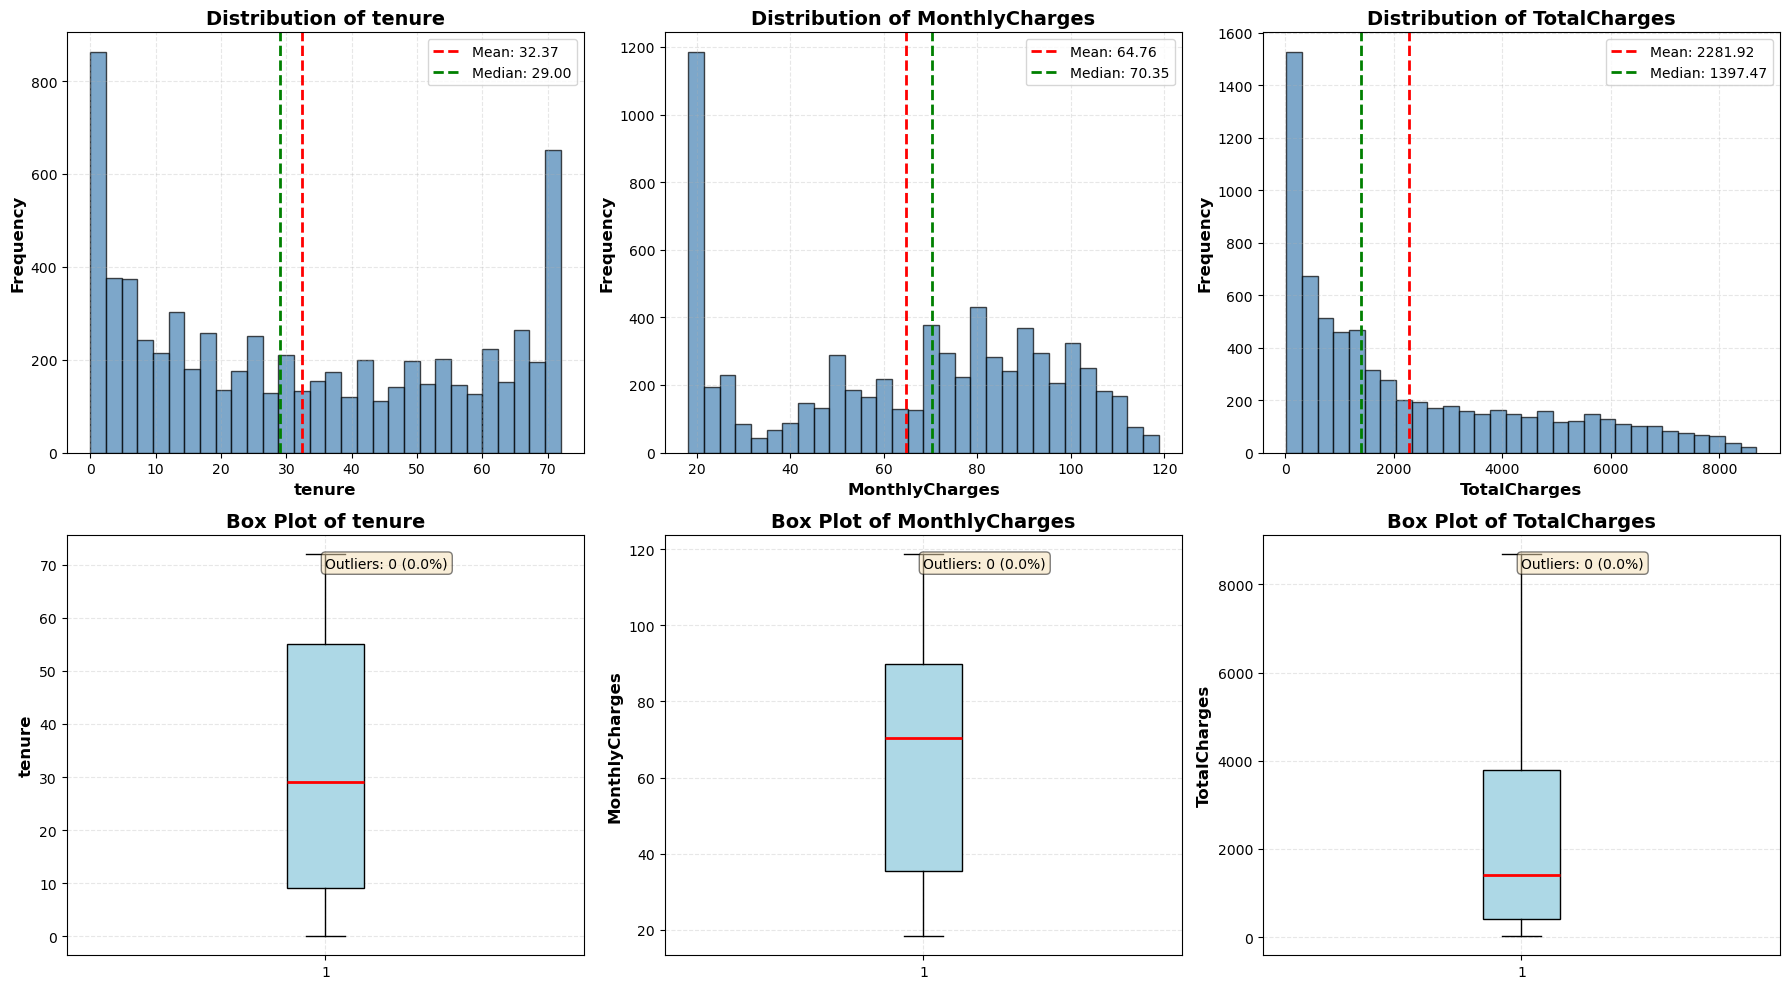


TENURE DETAILED STATISTICS
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Skewness: 0.240
Kurtosis: -1.387

Outlier Detection (IQR Method):
  Q1: 9.00
  Q3: 55.00
  IQR: 46.00
  Lower Bound: -60.00
  Upper Bound: 124.00
  Outliers: 0 (0.00%)

MONTHLYCHARGES DETAILED STATISTICS
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Skewness: -0.221
Kurtosis: -1.257

Outlier Detection (IQR Method):
  Q1: 35.50
  Q3: 89.85
  IQR: 54.35
  Lower Bound: -46.02
  Upper Bound: 171.38
  Outliers: 0 (0.00%)

TOTALCHARGES DETAILED STATISTICS
count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684

In [50]:
## Understanding distribution of features
# Numerical Features Distribution
print("="*70)
print("NUMERICAL FEATURES DISTRIBUTION ANALYSIS")
print("="*70)

# Prepare numerical data (convert TotalCharges)
df_viz = df.copy()
df_viz['TotalCharges'] = pd.to_numeric(df_viz['TotalCharges'], errors='coerce')
df_viz['TotalCharges'] = df_viz['TotalCharges'].fillna(
    df_viz['TotalCharges'].median()
)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Histogram
    axes[idx].hist(df_viz[col], bins=30, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=12, weight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=12, weight='bold')
    axes[idx].set_title(f'Distribution of {col}', 
                        fontsize=14, weight='bold')
    axes[idx].grid(alpha=0.3, linestyle='--')
    
    # Add mean and median lines
    mean_val = df_viz[col].mean()
    median_val = df_viz[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()
    
    # Box plot
    axes[idx + 3].boxplot(df_viz[col], vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='black'),
                          medianprops=dict(color='red', linewidth=2),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'))
    axes[idx + 3].set_ylabel(col, fontsize=12, weight='bold')
    axes[idx + 3].set_title(f'Box Plot of {col}', 
                            fontsize=14, weight='bold')
    axes[idx + 3].grid(alpha=0.3, linestyle='--')
    
    # Statistical summary on plot
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_viz[(df_viz[col] < lower_bound) | (df_viz[col] > upper_bound)][col]
    
    axes[idx + 3].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                       transform=axes[idx + 3].transAxes,
                       fontsize=10, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in numerical_features:
    print(f"\n{'='*70}")
    print(f"{col.upper()} DETAILED STATISTICS")
    print(f"{'='*70}")
    
    stats = df_viz[col].describe()
    print(stats)
    
    # Skewness and kurtosis
    skewness = df_viz[col].skew()
    kurtosis = df_viz[col].kurt()
    print(f"\nSkewness: {skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")
    
    # Outlier analysis
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_viz[(df_viz[col] < lower_bound) | (df_viz[col] > upper_bound)]
    
    print(f"\nOutlier Detection (IQR Method):")
    print(f"  Q1: {q1:.2f}")
    print(f"  Q3: {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
print(f"\n{'='*70}")

### Insights:
- TENURE DISTRIBUTION:
   - Shape is relatively uniform with slight peaks at both ends meaning New customers (0-12 months) and loyal customers (60-72 months).
   - Mean: 32.37 months ≈ Median: 29 months (minimal skew)
   - Skewness: ~0.24 (slightly right-skewed)
   - Range: 0-72 months (full customer lifecycle represented)

- MONTHLY CHARGES DISTRIBUTION:
   - Shape is roughly symmetrical with the exception of $20 peak
   - Skewness: -0.22 (slight left skew)
   - Range: $18.25 - $118.75 (wide range)

- TOTAL CHARGES DISTRIBUTION:
   - Shape is heavily right-skewed.
   - Mean: $2,282 >> Median: $1,397 (large gap)
   - Skewness: ~1 (significant right skew)
   - Range: $18.80 - $8,684.80 (very wide)


CATEGORICAL FEATURES DISTRIBUTION ANALYSIS


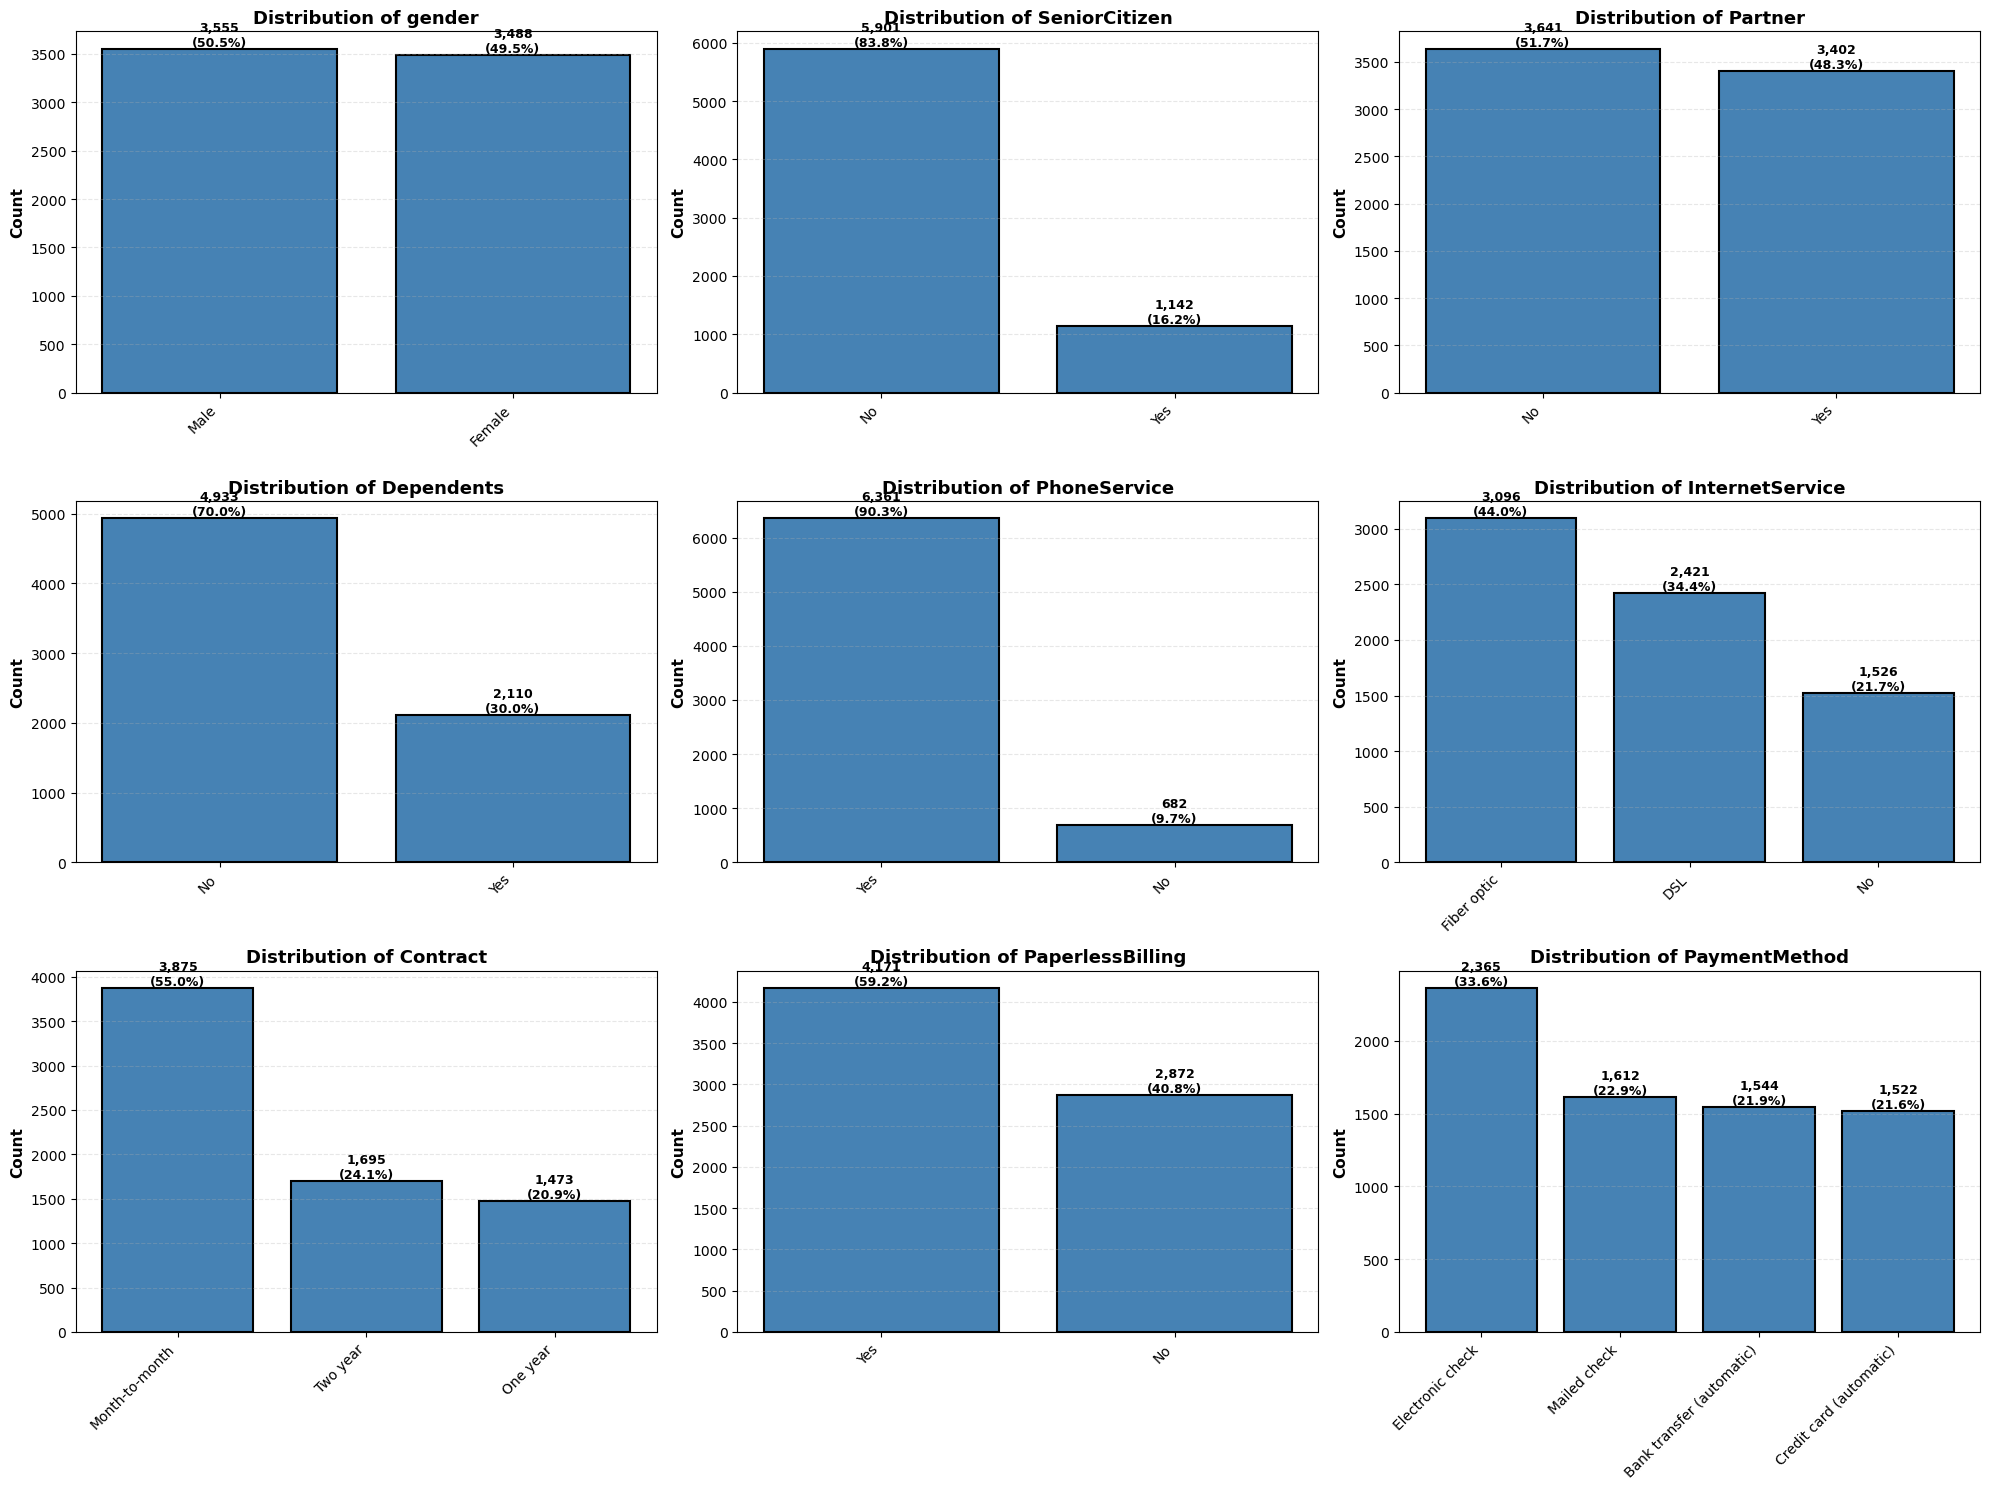


GENDER DISTRIBUTION
        Count  Percentage
gender                   
Male     3555    50.47565
Female   3488    49.52435

Majority class: Male (50.5%)
Minority class: Female (49.5%)
Balanced: 1.0:1 ratio

SENIORCITIZEN DISTRIBUTION
               Count  Percentage
SeniorCitizen                   
No              5901   83.785319
Yes             1142   16.214681

Majority class: No (83.8%)
Minority class: Yes (16.2%)
IMBALANCED: 5.2:1 ratio

PARTNER DISTRIBUTION
         Count  Percentage
Partner                   
No        3641    51.69672
Yes       3402    48.30328

Majority class: No (51.7%)
Minority class: Yes (48.3%)
Balanced: 1.1:1 ratio

DEPENDENTS DISTRIBUTION
            Count  Percentage
Dependents                   
No           4933   70.041176
Yes          2110   29.958824

Majority class: No (70.0%)
Minority class: Yes (30.0%)
Balanced: 2.3:1 ratio

PHONESERVICE DISTRIBUTION
              Count  Percentage
PhoneService                   
Yes            6361   90.31662

In [53]:
#Categorical Features Distribution

print("\n" + "="*70)
print("CATEGORICAL FEATURES DISTRIBUTION ANALYSIS")
print("="*70)

# Select key categorical features for visualization
categorical_viz = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'InternetService', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

# Create visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_viz):
    if col == 'SeniorCitizen':
        # Convert to Yes/No for better visualization
        data = df[col].map({0: 'No', 1: 'Yes'})
    else:
        data = df[col]
    
    counts = data.value_counts()
    percentages = counts / len(df) * 100
    
    # Bar plot
    bars = axes[idx].bar(range(len(counts)), counts.values, 
                         color='steelblue', edgecolor='black', linewidth=1.5)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count', fontsize=11, weight='bold')
    axes[idx].set_title(f'Distribution of {col}', 
                        fontsize=13, weight='bold')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height):,}\n({pct:.1f}%)',
                      ha='center', va='bottom', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

# Detailed statistics
for col in categorical_viz:
    print(f"\n{'='*70}")
    print(f"{col.upper()} DISTRIBUTION")
    print(f"{'='*70}")
    
    if col == 'SeniorCitizen':
        data = df[col].map({0: 'No', 1: 'Yes'})
    else:
        data = df[col]
    
    counts = data.value_counts()
    percentages = counts / len(df) * 100
    
    result = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(result)
    
    # Identify majority/minority classes
    majority = result.idxmax()['Count']
    minority = result.idxmin()['Count']
    print(f"\nMajority class: {majority} ({result.loc[majority, 'Percentage']:.1f}%)")
    print(f"Minority class: {minority} ({result.loc[minority, 'Percentage']:.1f}%)")
    
    # Check for severe imbalance
    imbalance_ratio = result.loc[majority, 'Count'] / result.loc[minority, 'Count']
    if imbalance_ratio > 3:
        print(f"IMBALANCED: {imbalance_ratio:.1f}:1 ratio")
    else:
        print(f"Balanced: {imbalance_ratio:.1f}:1 ratio")

print(f"\n{'='*70}")

### Insights:

DEMOGRAPHIC FEATURES:
- Gender is mostly balanced with Male (50.5%) and Famale (49.5%)
- SENIOR CITIZEN is imbalanced with No (83.8%) and Yes (16.2%).
- PARTNER is balanced with No (51.7%) and Yes (48.3%).
- DEPENDENTS is imbalanced with No (70.0%) and Yes (30.0%).

SERVICE FEATURES:
- PHONE SERVICE is mostly imbalanced with Yes (90.3%) and No (9.7%).
- INTERNET SERVICE is roughly balanced across three categories with Fiber optic: (44.0%), DSL (34.4%), and No (21.6%).
- CONTRACT is imbalanced with Month-to-month (55.0%), more than the combination of Two year (24.1%) and One year (20.9%).

ACCOUNT FEATURES:
- PAPERLESS BILLING is balanced with Yes (59.2%) and No: (40.8%).
- PAYMENT METHOD is balanced across four categories with Electronic check (33.6%), Mailed check (22.9%), Bank transfer (auto): (21.9%), and Credit card (auto): 21.6%.

### 2.3.2 Understanding relationship between variables

CORRELATION ANALYSIS


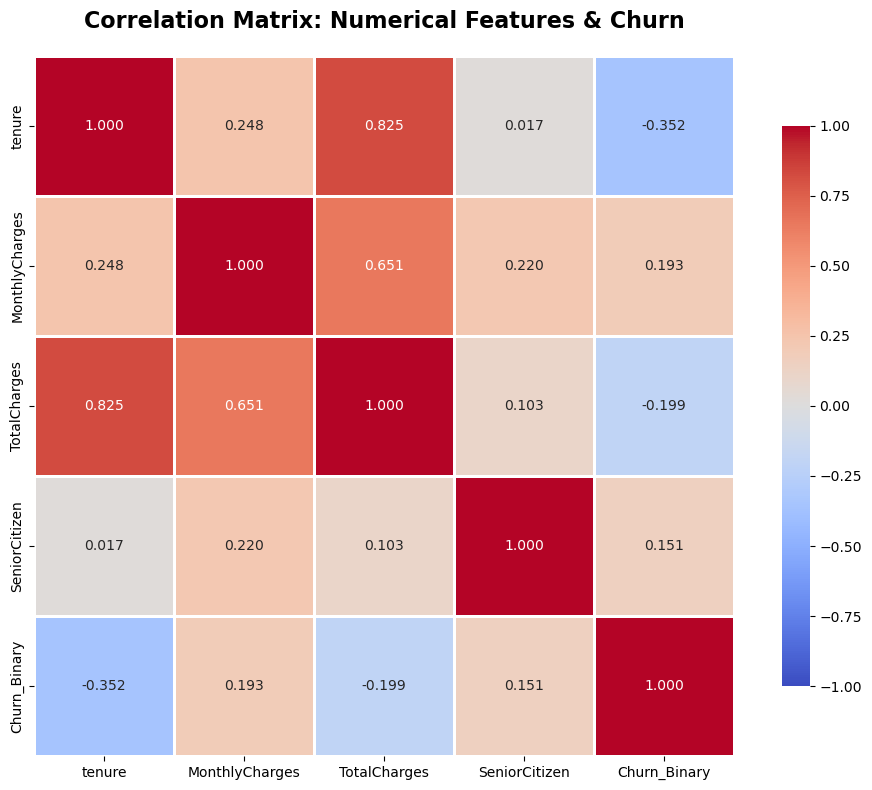


HIGH CORRELATIONS (|r| > 0.5)
tenure               ↔ TotalCharges        : +0.825
MonthlyCharges       ↔ TotalCharges        : +0.651

FEATURE CORRELATION WITH CHURN (Ranked)
MonthlyCharges      : +0.193  (MODERATE ↑ Positive)
SeniorCitizen       : +0.151  (MODERATE ↑ Positive)
TotalCharges        : -0.199  (MODERATE ↓ Negative)
tenure              : -0.352  (STRONG ↓ Negative)


In [59]:
## Understanding relationship between variables
# Correlation Analysis
print("="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Prepare numerical dataset
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['TotalCharges'] = df_corr['TotalCharges'].fillna(
    df_corr['TotalCharges'].median()
)

# Encode target
df_corr['Churn_Binary'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical features
numerical_features_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 
                           'SeniorCitizen', 'Churn_Binary']

# Calculate correlation matrix
correlation_matrix = df_corr[numerical_features_corr].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix: Numerical Features & Churn', 
          fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations
print("\n" + "="*70)
print("HIGH CORRELATIONS (|r| > 0.5)")
print("="*70)

high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr:
    for item in sorted(high_corr, key=lambda x: abs(x['Correlation']), reverse=True):
        print(f"{item['Feature 1']:20s} ↔ {item['Feature 2']:20s}: {item['Correlation']:+.3f}")
else:
    print("No correlations above 0.5 threshold")

print("="*70)

# Churn correlation ranking
churn_correlations = correlation_matrix['Churn_Binary'].drop('Churn_Binary').sort_values(ascending=False)

print("\n" + "="*70)
print("FEATURE CORRELATION WITH CHURN (Ranked)")
print("="*70)
for feature, corr in churn_correlations.items():
    direction = "↑ Positive" if corr > 0 else "↓ Negative"
    strength = "STRONG" if abs(corr) > 0.3 else "MODERATE" if abs(corr) > 0.15 else "WEAK"
    print(f"{feature:20s}: {corr:+.3f}  ({strength} {direction})")
print("="*70)

### Insights:
- There is a very strong positive r value which is +0.825 between tenure and TotalCharges, and a strong positive r value which is +0.651 between MonthlyCharges and TotalCharges.

- Churn correlations:
    - We can find r = -0.352 (MODERATE negative) with tenure, r = +0.193 (WEAK positive) with MonthlyCharges, r = -0.198 (WEAK negative) with TotalCharges, and r = +0.151 (WEAK positive) with SeniorCitizen.


CHURN RATE BY CATEGORICAL FEATURES


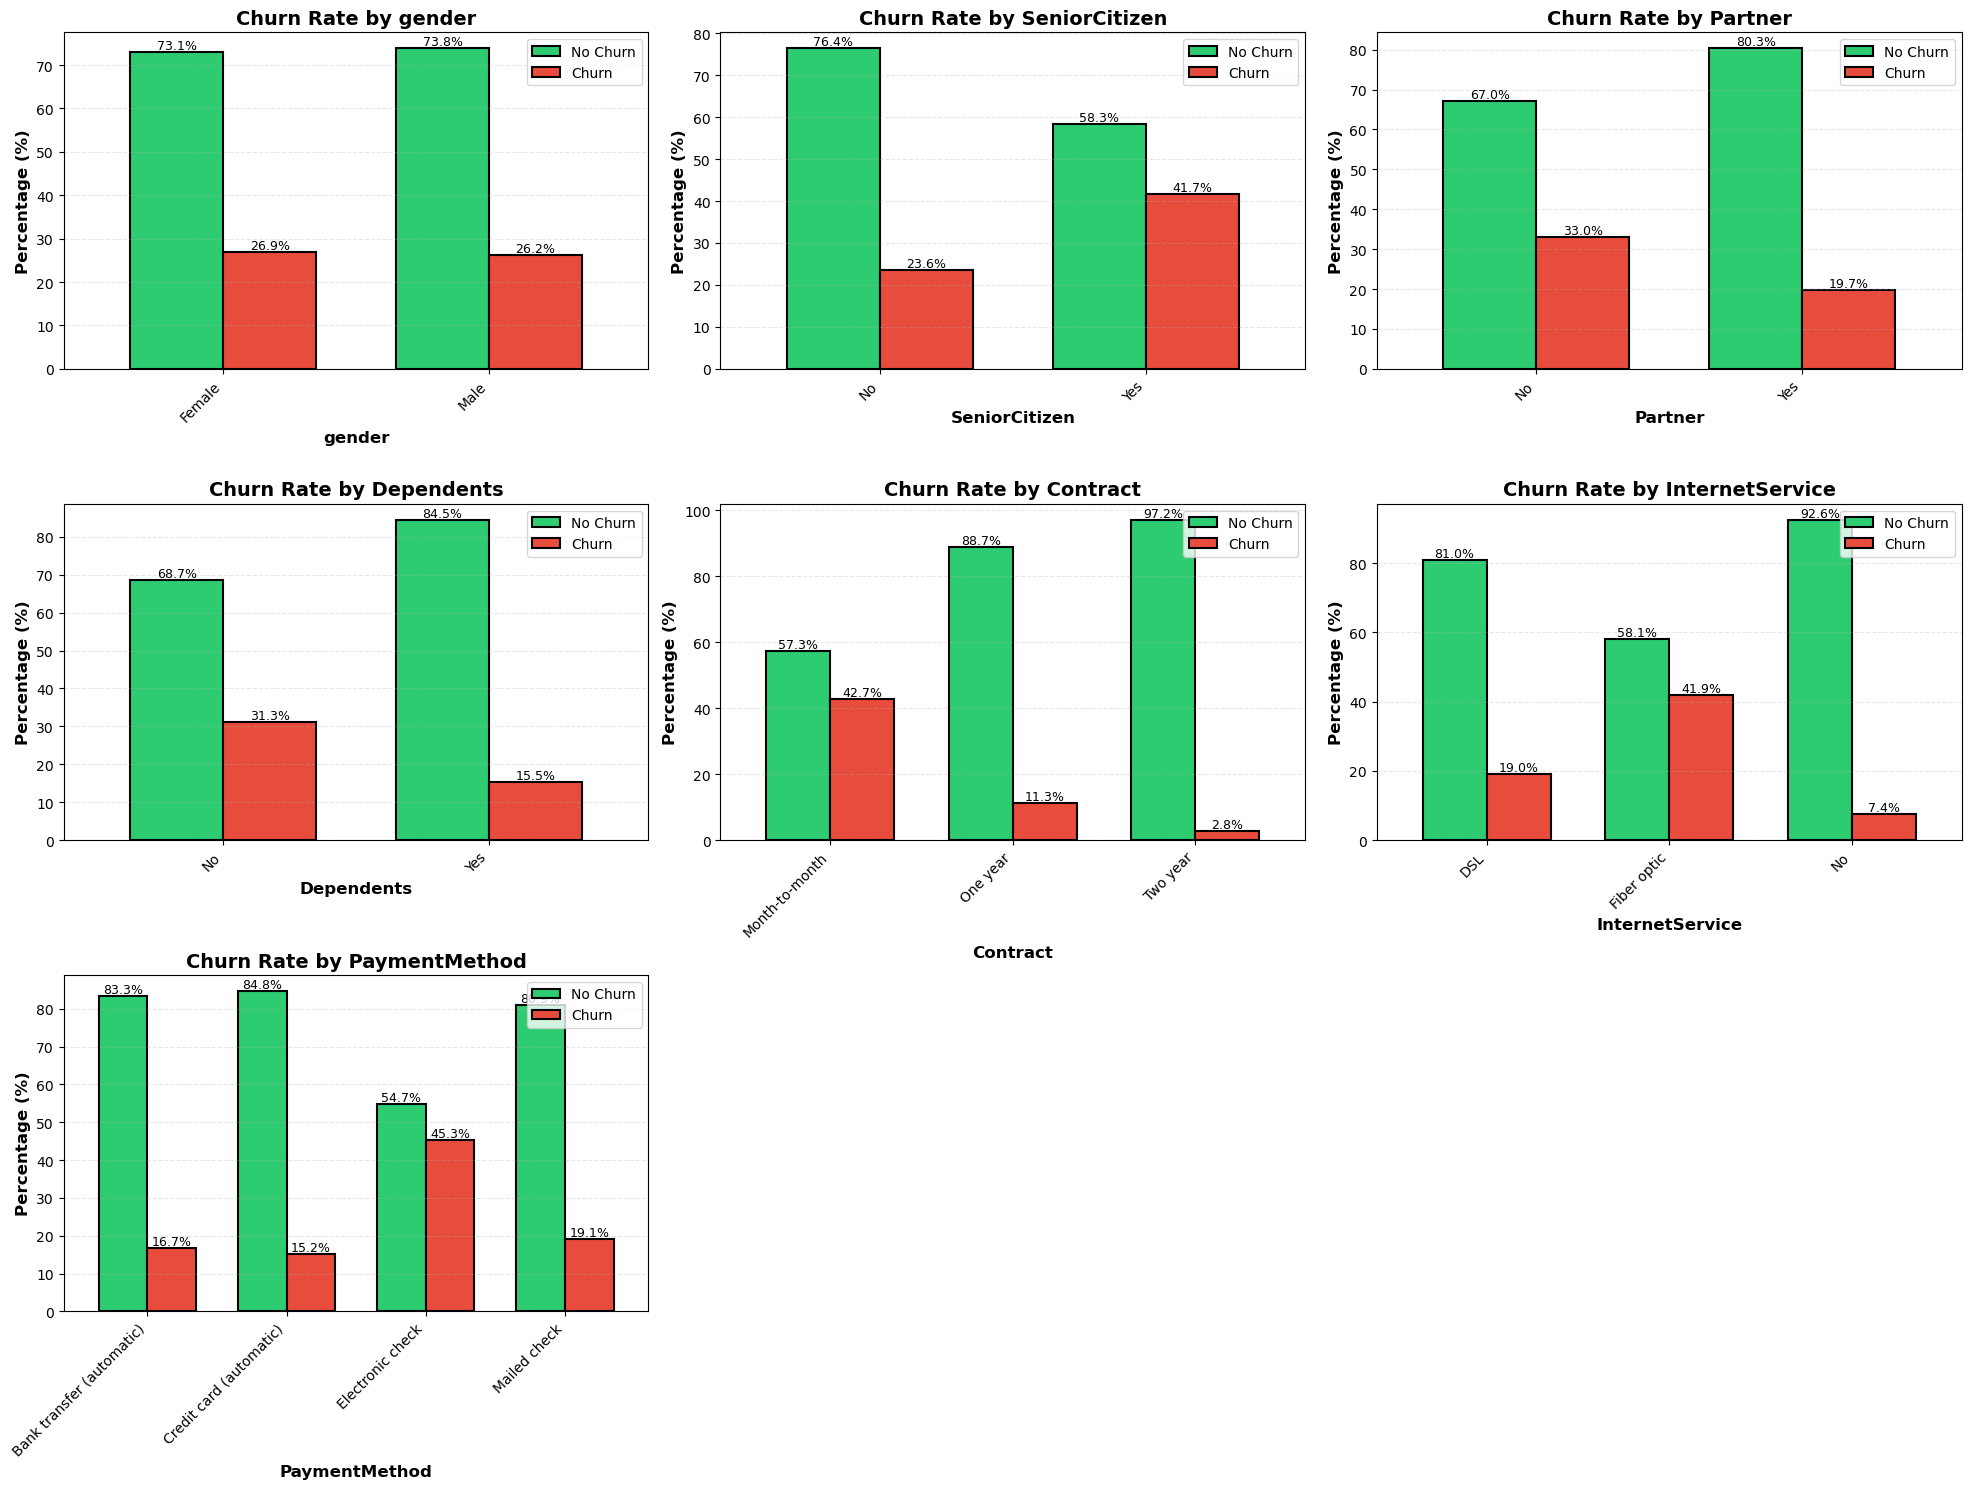


CHURN ANALYSIS: GENDER

Counts:
Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043

Churn Rate (%):
gender
Female    26.920872
Male      26.160338
Name: Yes, dtype: float64

HIGHEST CHURN: Female (26.9%)
LOWEST CHURN:  Male (26.2%)
Variance: 0.5% (higher = more predictive)

CHURN ANALYSIS: SENIORCITIZEN

Counts:
Churn            No   Yes   All
SeniorCitizen                  
No             4508  1393  5901
Yes             666   476  1142
All            5174  1869  7043

Churn Rate (%):
SeniorCitizen
Yes    41.681261
No     23.606168
Name: Yes, dtype: float64

HIGHEST CHURN: Yes (41.7%)
LOWEST CHURN:  No (23.6%)
Variance: 12.8% (higher = more predictive)

CHURN ANALYSIS: PARTNER

Counts:
Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043

Churn Rate (%):
Partner
No     32.957979
Yes    19.664903
Name: Yes, dtype: float64

HIGHEST CHURN

In [62]:
# Churn Rate by Categorical Features

print("\n" + "="*70)
print("CHURN RATE BY CATEGORICAL FEATURES")
print("="*70)

# Key categorical features to analyze
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'Contract', 'InternetService', 'PaymentMethod']

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    # Calculate churn rate by category
    if feature == 'SeniorCitizen':
        data = df.copy()
        data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        churn_by_cat = pd.crosstab(data[feature], data['Churn'], normalize='index') * 100
    else:
        churn_by_cat = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Plot
    churn_by_cat.plot(kind='bar', stacked=False, ax=axes[idx], 
                      color=['#2ecc71', '#e74c3c'], width=0.7,
                      edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel(feature, fontsize=12, weight='bold')
    axes[idx].set_ylabel('Percentage (%)', fontsize=12, weight='bold')
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=14, weight='bold')
    axes[idx].legend(['No Churn', 'Churn'], loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Remove empty subplots
for idx in range(len(categorical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Detailed statistics
churn_analysis = []

for feature in categorical_features:
    print(f"\n{'='*70}")
    print(f"CHURN ANALYSIS: {feature.upper()}")
    print(f"{'='*70}")
    
    if feature == 'SeniorCitizen':
        data = df.copy()
        data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        crosstab = pd.crosstab(data[feature], data['Churn'], margins=True)
        churn_rate = pd.crosstab(data[feature], data['Churn'], normalize='index') * 100
    else:
        crosstab = pd.crosstab(df[feature], df['Churn'], margins=True)
        churn_rate = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    print("\nCounts:")
    print(crosstab)
    print("\nChurn Rate (%):")
    print(churn_rate['Yes'].sort_values(ascending=False))
    
    # Identify high and low churn categories
    max_churn = churn_rate['Yes'].idxmax()
    min_churn = churn_rate['Yes'].idxmin()
    churn_variance = churn_rate['Yes'].std()
    
    print(f"\nHIGHEST CHURN: {max_churn} ({churn_rate.loc[max_churn, 'Yes']:.1f}%)")
    print(f"LOWEST CHURN:  {min_churn} ({churn_rate.loc[min_churn, 'Yes']:.1f}%)")
    print(f"Variance: {churn_variance:.1f}% (higher = more predictive)")
    
    churn_analysis.append({
        'Feature': feature,
        'Max_Churn_Category': max_churn,
        'Max_Churn_Rate': churn_rate.loc[max_churn, 'Yes'],
        'Min_Churn_Category': min_churn,
        'Min_Churn_Rate': churn_rate.loc[min_churn, 'Yes'],
        'Churn_Rate_Variance': churn_variance
    })

# Summary of predictive power
print(f"\n{'='*70}")
print("FEATURE PREDICTIVE POWER RANKING (By Churn Rate Variance)")
print(f"{'='*70}")

churn_analysis_df = pd.DataFrame(churn_analysis).sort_values('Churn_Rate_Variance', ascending=False)
print(churn_analysis_df[['Feature', 'Churn_Rate_Variance']].to_string(index=False))
print(f"{'='*70}")

## Insights:
- For Contract, Month-to-month has 42.7% churn meaning customers with short duration subscription are more likely to stop using the telecom service.
- For InternetService, Fiber optic has unexpectedly highest churn likely due to premium pricing + competition.
- For PaymentMethod, Electronic check has 3x higher churn than automated methods.
- For SeniorCitizen, they are almost 2 times likely to churn.

Overall Variance Ranking:
1. Contract (Variance: ~20%)
2. InternetService (Variance: ~17%)
3. PaymentMethod (Variance: ~15%)
4. SeniorCitizen (Variance: ~13%)
5. Partner/Dependents (Variance: ~9%)
6. Gender (Variance: ~0.5%) - WEAK

By looking at the variance ranking, everything except gender should be included in feature selection.

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection